# Recommend Movies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

----

# Analyze Data

In [2]:
data_netflix = pd.read_csv('netflix_titles.csv')
data_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
data_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
data_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
data_netflix.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


-----

# Clear Dataset and Preparate New Dataset

In [6]:
data_netflix = data_netflix.rename(columns={'date_added': 'date_added_platform', 'duration': 'duration_seconds', 'listed_in': 'gender_type', 'type': 'movie_or_tv_show'})
data_netflix[:5]

,show_id,movie_or_tv_show,title,director,cast,country,date_added_platform,release_year,rating,duration_seconds,gender_type,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


-----

### Drop Columns

In [7]:
import copy

data_netflix1 = copy.deepcopy(data_netflix)

In [8]:

data_netflix.drop(columns=['rating', 'show_id'], axis=1, inplace=True)

-----

### Missing data

In [9]:
data_netflix['cast'] = data_netflix['cast'].fillna('uninformed cast')
data_netflix['director'] = data_netflix['director'].fillna('uninformed director')
data_netflix['country'] = data_netflix['country'].fillna('uninformed country')

In [10]:
data_netflix.dropna(subset=['date_added_platform'], inplace=True)

In [11]:
data_netflix.dropna(subset=['duration_seconds'], inplace=True)

In [12]:
data_netflix.isnull().sum()

movie_or_tv_show       0
title                  0
director               0
cast                   0
country                0
date_added_platform    0
release_year           0
duration_seconds       0
gender_type            0
description            0
dtype: int64

-----

### Clear column genre type

At this point I decided to apply the "upper()" function, if any entry has the same name but with a difference in character, because Python recognizes it with two different strings

In [13]:
if 'Documentaries' != 'documentaries':
    print('True')
else:
    print('False')

True


In [14]:
data_netflix['gender_type'] =  data_netflix['gender_type'].apply(lambda x: x.upper())

In [15]:
data_netflix.tail(60)

,movie_or_tv_show,title,director,cast,country,date_added_platform,release_year,duration_seconds,gender_type,description
8747,TV Show,Winsanity,uninformed director,Donald Faison,United States,"December 15, 2018",2016,1 Season,REALITY TV,Actor Donald Faison hosts this game show in wh...
8748,Movie,Winter of Our Dreams,John Duigan,"Judy Davis, Bryan Brown, Cathy Downes, Baz Luh...",Australia,"November 1, 2016",1981,86 min,"CLASSIC MOVIES, DRAMAS","After the death of a long-ago lover, married p..."
8749,TV Show,Winter Sun,uninformed director,"Şükrü Özyıldız, Aslı Enver, Şenay Gürler, Başa...",Turkey,"August 1, 2017",2014,1 Season,"INTERNATIONAL TV SHOWS, TV DRAMAS, TV THRILLERS",Years after ruthless businessmen kill his fath...
8750,Movie,Winter's Bone,Debra Granik,"Jennifer Lawrence, John Hawkes, Kevin Breznaha...",United States,"March 1, 2019",2010,100 min,"DRAMAS, INDEPENDENT MOVIES","In this unflinching noir drama, a resilient te..."
8751,Movie,Wish I Was Here,Zach Braff,"Zach Braff, Kate Hudson, Donald Faison, Joey K...",United States,"August 16, 2018",2014,106 min,"COMEDIES, DRAMAS, INDEPENDENT MOVIES","With his acting career moribund, Aidan Bloom s..."
8752,Movie,Wish Man,Theo Davies,"Andrew Steel, Kirby Bliss Blanton, Tom Sizemor...",United States,"December 3, 2019",2019,108 min,"CHILDREN & FAMILY MOVIES, DRAMAS","After surviving a life-threatening accident, a..."
8753,Movie,Withdrawn,Adrian Murray,"Aaron Keogh, Molly Reisman, Dean Tardioli, Gre...",Canada,"May 1, 2018",2017,74 min,"DRAMAS, INDEPENDENT MOVIES",Unable to pay bills and unwilling to change hi...
8754,Movie,Wolves,Bart Freundlich,"Michael Shannon, Carla Gugino, Taylor John Smi...",United States,"March 29, 2019",2016,109 min,"DRAMAS, INDEPENDENT MOVIES, SPORTS MOVIES",A promising high school basketball player has ...
8755,TV Show,Women Behind Bars,uninformed director,uninformed cast,United States,"November 1, 2016",2010,3 Seasons,"CRIME TV SHOWS, DOCUSERIES",This reality series recounts true stories of w...
8756,Movie,Woodstock,Barak Goodman,uninformed cast,United States,"August 13, 2019",2019,97 min,"DOCUMENTARIES, MUSIC & MUSICALS",For the 50th anniversary of the legendary Wood...


-----

In [16]:
data_netflix['gender_type']

0                                           DOCUMENTARIES
1         INTERNATIONAL TV SHOWS, TV DRAMAS, TV MYSTERIES
2       CRIME TV SHOWS, INTERNATIONAL TV SHOWS, TV ACT...
3                                  DOCUSERIES, REALITY TV
4       INTERNATIONAL TV SHOWS, ROMANTIC TV SHOWS, TV ...
                              ...                        
8802                       CULT MOVIES, DRAMAS, THRILLERS
8803               KIDS' TV, KOREAN TV SHOWS, TV COMEDIES
8804                              COMEDIES, HORROR MOVIES
8805                   CHILDREN & FAMILY MOVIES, COMEDIES
8806       DRAMAS, INTERNATIONAL MOVIES, MUSIC & MUSICALS
Name: gender_type, Length: 8794, dtype: object

In [17]:
df_split = data_netflix['gender_type'].str.split(',', expand=True)
df_split = df_split.fillna('-')
df_split

,0,1,2
0,DOCUMENTARIES,-,-
1,INTERNATIONAL TV SHOWS,TV DRAMAS,TV MYSTERIES
2,CRIME TV SHOWS,INTERNATIONAL TV SHOWS,TV ACTION & ADVENTURE
3,DOCUSERIES,REALITY TV,-
4,INTERNATIONAL TV SHOWS,ROMANTIC TV SHOWS,TV COMEDIES
...,...,...,...
8802,CULT MOVIES,DRAMAS,THRILLERS
8803,KIDS' TV,KOREAN TV SHOWS,TV COMEDIES
8804,COMEDIES,HORROR MOVIES,-
8805,CHILDREN & FAMILY MOVIES,COMEDIES,-


In [18]:
print(len(df_split.columns))

3


# Data Visualisation

In [19]:
sns.set_theme(style="darkgrid")

In [20]:
data_netflix.head()

,movie_or_tv_show,title,director,cast,country,date_added_platform,release_year,duration_seconds,gender_type,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,uninformed cast,United States,"September 25, 2021",2020,90 min,DOCUMENTARIES,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,uninformed director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,2 Seasons,"INTERNATIONAL TV SHOWS, TV DRAMAS, TV MYSTERIES","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",uninformed country,"September 24, 2021",2021,1 Season,"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, TV ACT...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,uninformed director,uninformed cast,uninformed country,"September 24, 2021",2021,1 Season,"DOCUSERIES, REALITY TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,uninformed director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,2 Seasons,"INTERNATIONAL TV SHOWS, ROMANTIC TV SHOWS, TV ...",In a city of coaching centers known to train I...


In [21]:
data_netflix1['movie_or_tv_show'].value_counts()

Movie      6131
TV Show    2676
Name: movie_or_tv_show, dtype: int64

### Content Type Distribution Plot

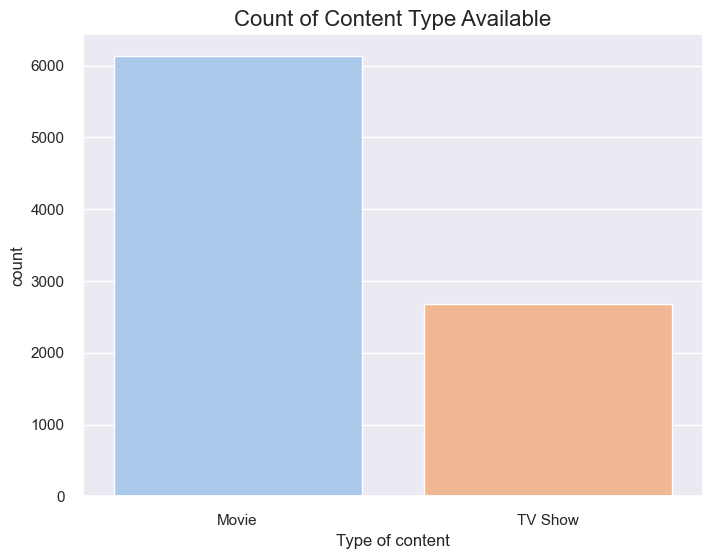

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(data=data_netflix1, x='movie_or_tv_show', palette='pastel')
plt.title('Count of Content Type Available', fontsize = 16)
plt.xlabel('Type of content', fontsize=12)
plt.show()

**This bar plot shows the distribution of content types (movies and TV shows) on Netflix. The key insights from this plot are the proportion of movies to TV shows and how this proportion has evolved over time.**

Insight: Note the balance between movies and TV shows. A higher number of movies could suggest a focus on diverse, one-time content, while more TV shows might indicate a strategy to keep viewers engaged over longer periods.

### Rating Distribution Plot

In [23]:
nfdf_rat = data_netflix1['rating'].value_counts().nlargest(5)
nfdf_rat

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: rating, dtype: int64

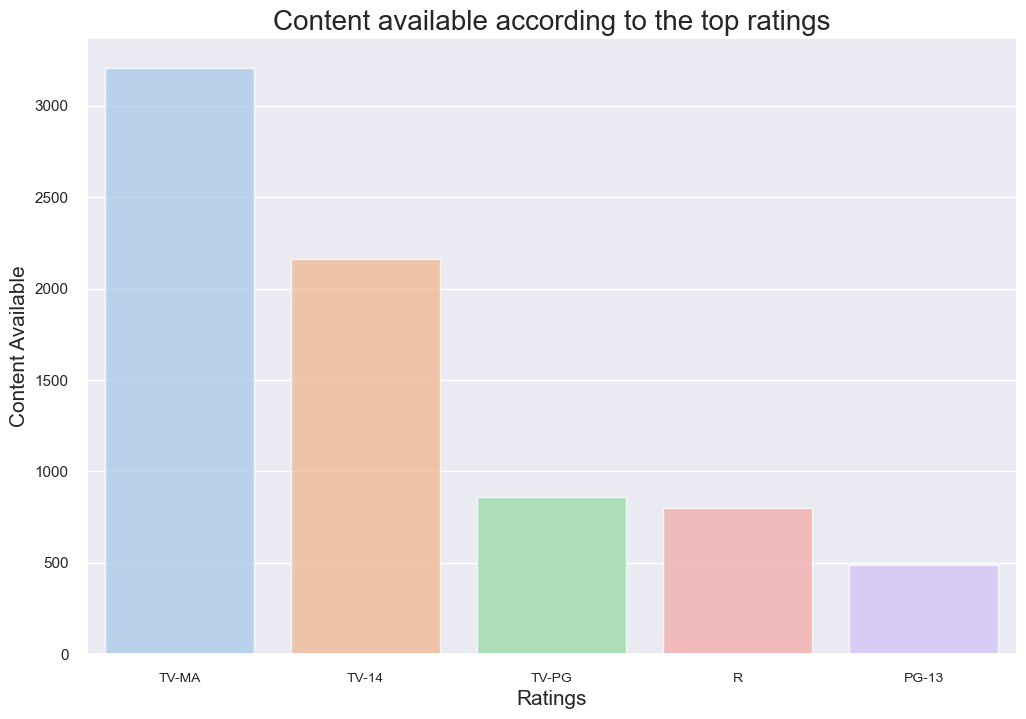

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(x=nfdf_rat.index, y=nfdf_rat, alpha=0.75, palette='pastel')
plt.title('Content available according to the top ratings', fontsize=20)
plt.ylabel('Content Available',fontsize=15)
plt.xlabel('Ratings', fontsize=15)
plt.xticks(fontsize=10)
plt.show()

**Here, we visualize the distribution of content ratings. This plot is essential to understand the target audience for Netflix content and how it aligns with the platform's content strategy.**

Insight: Analyze the prevalence of different ratings (e.g., PG, R). A concentration of mature content might suggest targeting an older audience, while more family-friendly ratings indicate a broader target demographic.


This information can be beneficial to the industry leader in deciding the distribution of
content in respect of the rating of viewers according to the available content. Additionally, it
is helpful for people to analyse the movies and tv shows content in respect of the rating they
got from the authorized certification committee. 


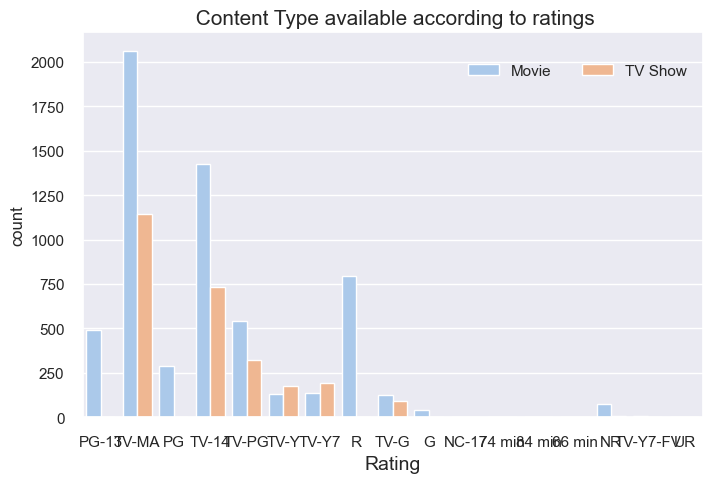

In [35]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data=data_netflix1, x='rating', hue='movie_or_tv_show', palette='pastel')
plt.title(' Content Type available according to ratings', fontsize=15)
plt.xlabel('Rating', fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(0.600,0.90),
          ncol=3, fancybox=True, shadow=True)
plt.show()

### Regional Content Availability

 **Differences in content availability across regions could reflect cultural preferences or licensing agreements**

In [37]:
nfdf_con = data_netflix1['country'].value_counts().nlargest(11)
nfdf_con

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Turkey             105
Name: country, dtype: int64

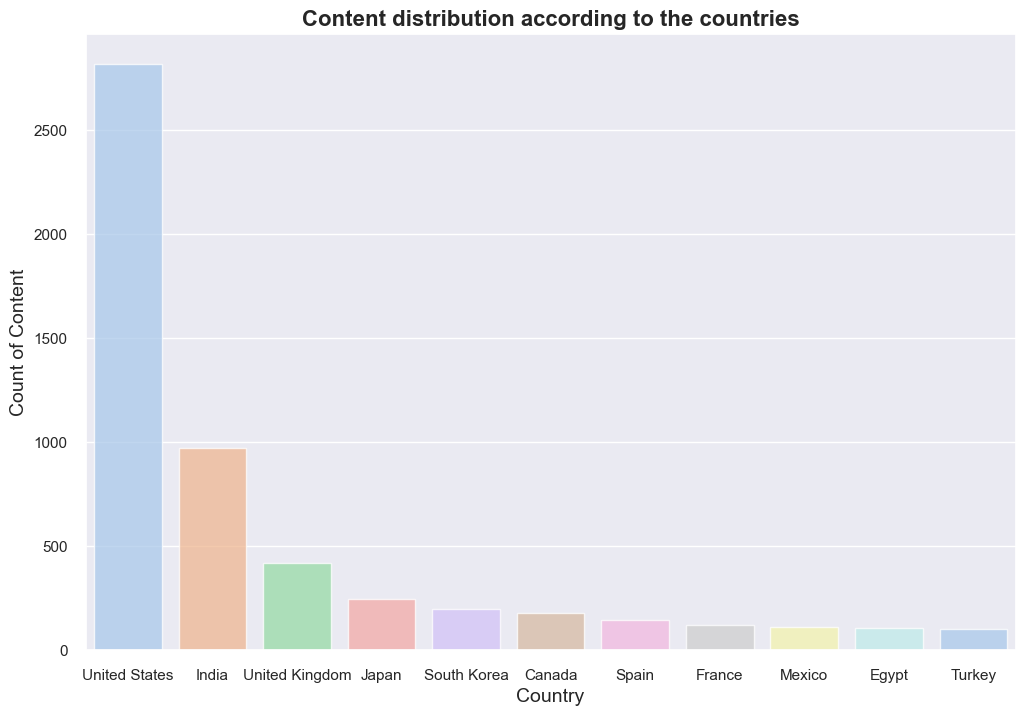

In [38]:
plt.figure(figsize=(12,8))
sns.barplot(x=nfdf_con.index, y=nfdf_con, alpha=0.75, palette='pastel')
plt.title('Content distribution according to the countries', fontsize=16, fontweight="bold")
plt.ylabel('Count of Content',fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.xticks(fontsize=11)
plt.show()

Observe variations in content across different regions. This can reveal Netflix's market-specific strategies, such as focusing on local content in certain regions to cater to cultural preferences.

By visualising the content available according to the geographical data, it would be beneficial
to industry leaders to decide which type of content is famous and liked by people to watch in
which region.

NA denotes “not available” which I have replaced while dealing with
missing values. 

In [39]:
nfdf_top_con = data_netflix1.query('country == ["United States", "India", "United Kingdom", "Japan", "South Korea", "Canada", "Spain", "France", "Mexico", "Turkey"]')
nfdf_top_con.head()

,show_id,movie_or_tv_show,title,director,cast,country,date_added_platform,release_year,rating,duration_seconds,gender_type,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...


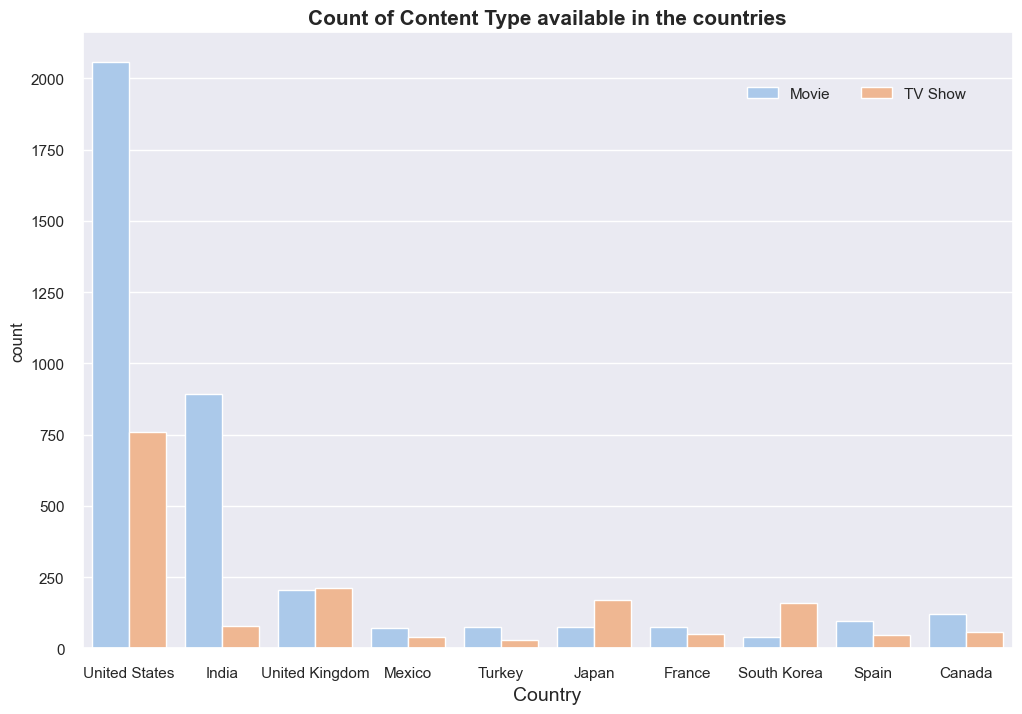

In [41]:
plt.figure(figsize=(12,8))
ax=sns.countplot(data=nfdf_top_con, x='country', hue='movie_or_tv_show', palette='pastel')
plt.title('Count of Content Type available in the countries', fontsize=15, fontweight="bold")
ax.legend(loc='center left', bbox_to_anchor=(0.70,0.90),
          ncol=3, fancybox=True, shadow=True)
plt.xlabel('Country', fontsize=14)
plt.show()

The above plot represents the content according to their types, it can be inference that Japan,
South Korea and the United Kingdom are the only countries in which TV shows have more 
content than movies; it can be thought of as the people tend to watch more TV shows than
movies in these countries. In contrast, the content available on Netflix is majorly movies.

# Top 5 directors on netflix

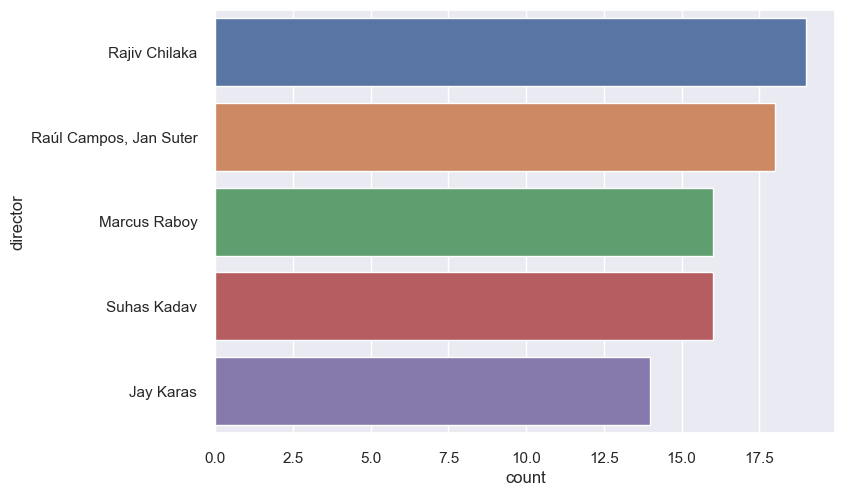

In [57]:
sns.countplot(y = "director" 
              , order = data_netflix1["director"].value_counts().index[0:5] 
              ,  data = data_netflix1);

In [27]:
data_netflix1.head(1)

,show_id,movie_or_tv_show,title,director,cast,country,date_added_platform,release_year,rating,duration_seconds,gender_type,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


# the first movie and TV show released

In [23]:
import plotly.graph_objects as go 
oldest_tv_shows = data_netflix1.sort_values(by="release_year")


fig = go.Figure(data=[go.Table(header=dict(values=['TV Show', 'release_year'],fill_color='#FFA07A'),
                 cells=dict(values=[oldest_tv_shows['title'],oldest_tv_shows['release_year']],fill_color='#FFBBBB'))
                     ])
fig.show()

In [48]:
data_netflix1.head(10)

,show_id,movie_or_tv_show,title,director,cast,country,date_added_platform,release_year,rating,duration_seconds,gender_type,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


### Release Year Analysis

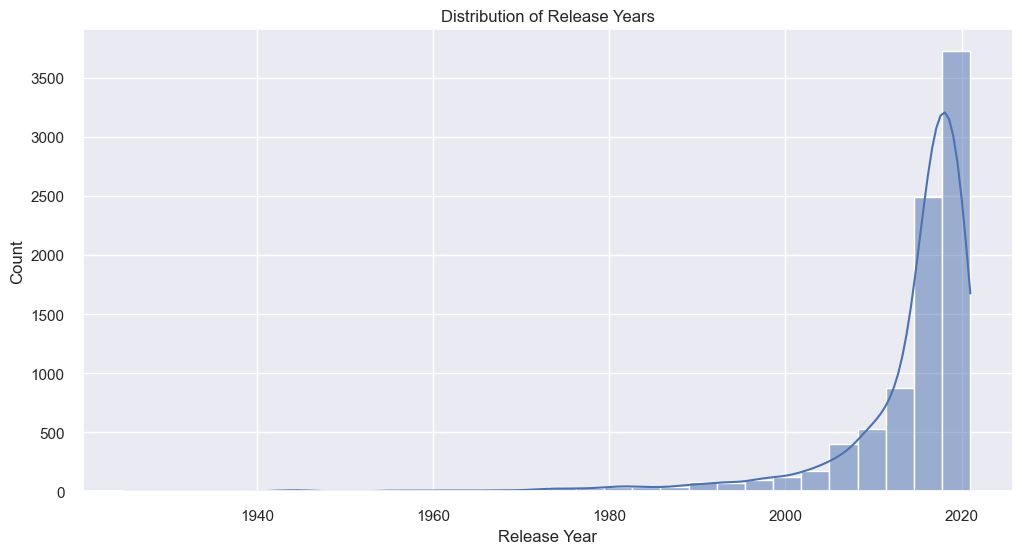

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data_netflix1['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


Text(0.5, 0, 'Release Year')

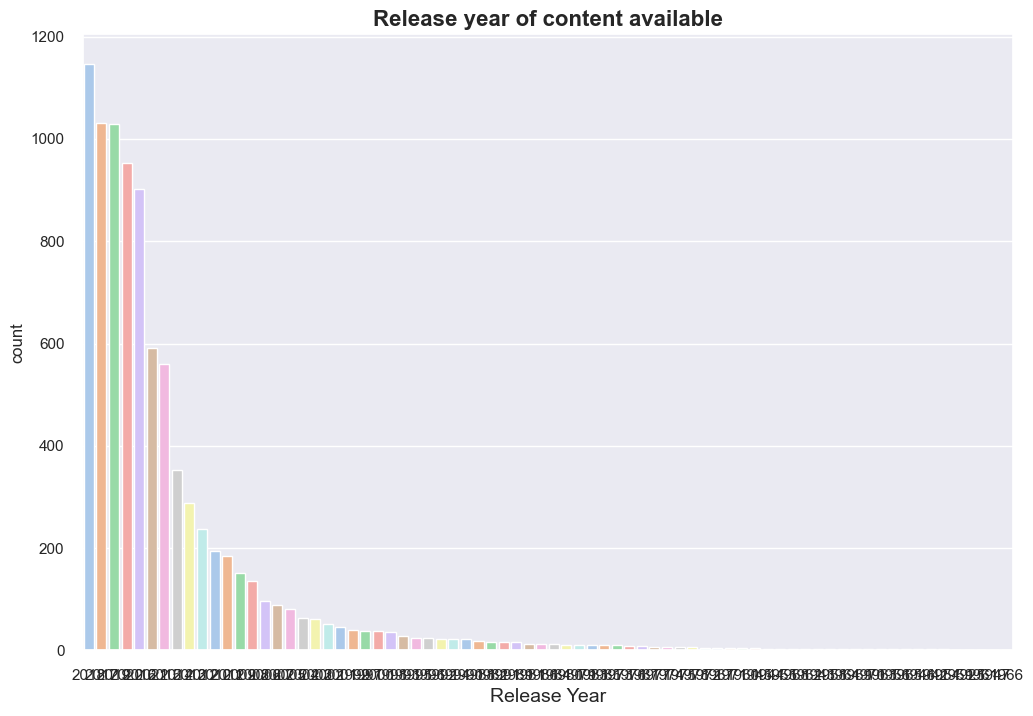

In [49]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="release_year", data=data_netflix1, palette="pastel",
                  order = data_netflix1["release_year"].value_counts().index)
plt.show
plt.title('Release year of content available', fontsize=16, fontweight="bold")
plt.xlabel('Release Year', fontsize=14)

**Insight: Observing the distribution of content by release year can reveal trends in content production over time. For instance, a recent uptick in the number of titles released might indicate an increase in content creation or acquisition by Netflix. This can also be reflective of the overall growth in the entertainment industry.**

The graph below shows that every year the content released gets increased except the year
2019, 2020 and 2021 which is due to the pandemic of coronavirus. 

### Content Upload Year Analysis

Text(0.5, 0, 'Year uploaded at Netflix')

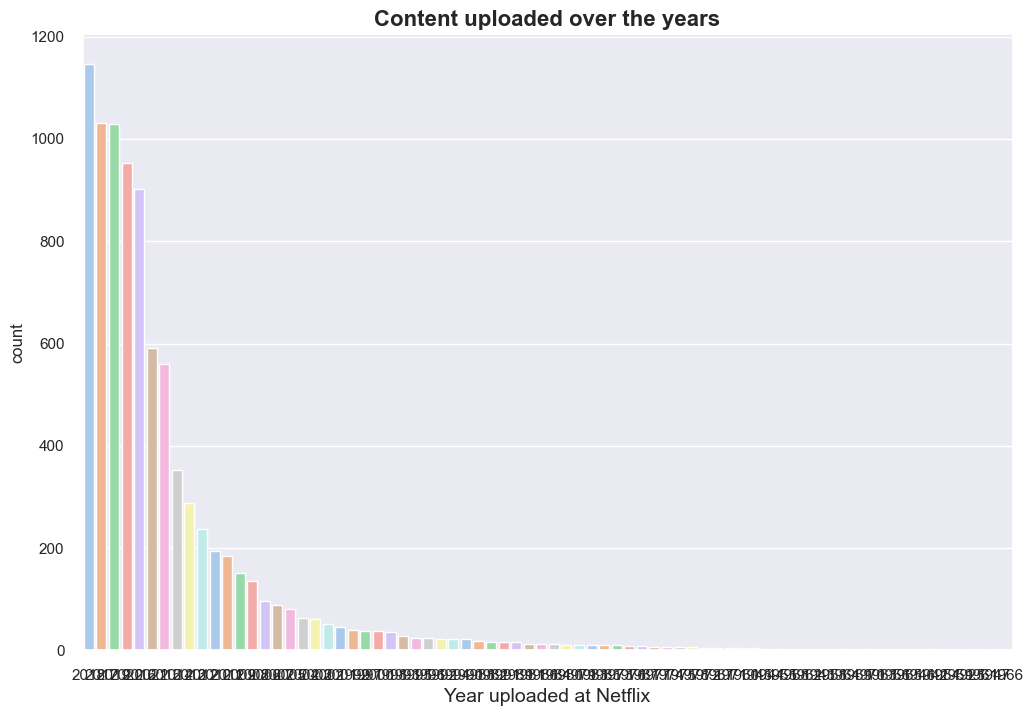

In [53]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="release_year", data=data_netflix1, palette="pastel",
                  order = data_netflix1["release_year"].value_counts().index)
plt.show
plt.title('Content uploaded over the years', fontsize=16, fontweight="bold")
plt.xlabel('Year uploaded at Netflix', fontsize=14)

**Insight: Analyzing the content upload year can provide insights into Netflix's content acquisition and release strategy. A lag between release year and upload year could suggest a strategy of acquiring older titles, while a shorter lag or same-year uploads indicate a focus on fresh, newly released content. Additionally, a significant increase in uploads during certain years might correlate with business growth phases, market expansions, or competitive responses.** 

It is evident from the above plot that content uploaded on Netflix is in recent years stating the
information that people like to watch few old movies on Netflix. Moreover, the same pattern
of content reduction in years 2020 and 2021 can be seen in the uploading of content.
This information can help industry advisors in deciding which content to upload to Netflix.




**Feature engineering**

In [17]:
group_dummies = [pd.get_dummies(df_split[y].apply(lambda x: x.strip()), dtype='int') for y in df_split.columns]
group_dummies[0].shape

(8807, 36)

In [18]:
group_dummies = pd.concat(group_dummies, axis=1)
group_dummies = group_dummies.fillna(0).astype('uint8')
group_dummies

,ACTION & ADVENTURE,ANIME FEATURES,ANIME SERIES,BRITISH TV SHOWS,CHILDREN & FAMILY MOVIES,CLASSIC & CULT TV,CLASSIC MOVIES,COMEDIES,CRIME TV SHOWS,CULT MOVIES,...,STAND-UP COMEDY & TALK SHOWS,TEEN TV SHOWS,THRILLERS,TV ACTION & ADVENTURE,TV COMEDIES,TV DRAMAS,TV HORROR,TV MYSTERIES,TV SCI-FI & FANTASY,TV THRILLERS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8804,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8805,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data_netflix['title'] = data_netflix['title'].apply(lambda x : x.upper())

In [20]:
data_netflix['title']

0        DICK JOHNSON IS DEAD
1               BLOOD & WATER
2                   GANGLANDS
3       JAILBIRDS NEW ORLEANS
4                KOTA FACTORY
                ...          
8802                   ZODIAC
8803              ZOMBIE DUMB
8804               ZOMBIELAND
8805                     ZOOM
8806                   ZUBAAN
Name: title, Length: 8807, dtype: object

In [21]:
# DATASET INPUT TO K-MEANS CLUSTERS NEW SERIES SETS
X_genre_type = np.array(group_dummies)
X_genre_type

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

------

# Elbow method

In [22]:
len(group_dummies.columns)

108

**Metric silhouette**

In [23]:
model_view_elbow =  KMeans()

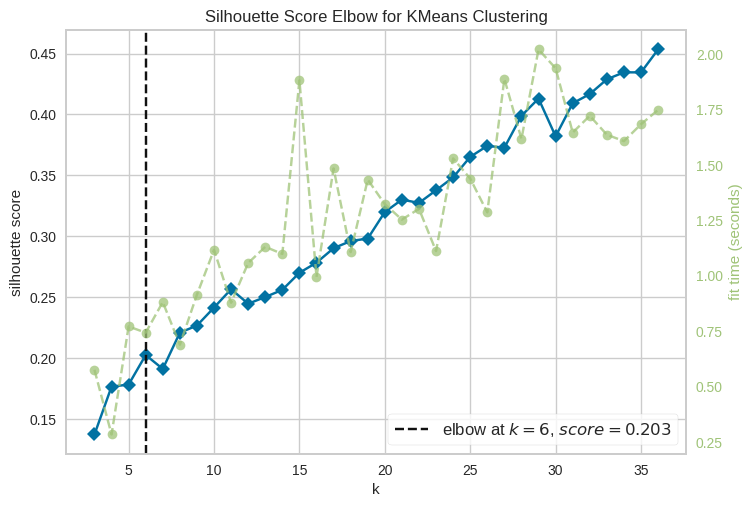

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [24]:
visualizer = KElbowVisualizer(model_view_elbow, k=(3,37), metric='silhouette')

visualizer.fit(X_genre_type)        
visualizer.show()

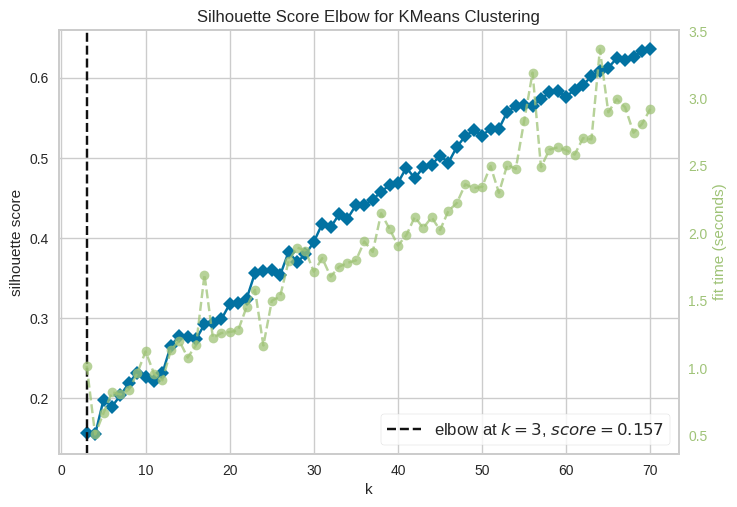

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [25]:
visualizer = KElbowVisualizer(model_view_elbow, k=(3,71), metric='silhouette')

visualizer.fit(X_genre_type)        
visualizer.show()

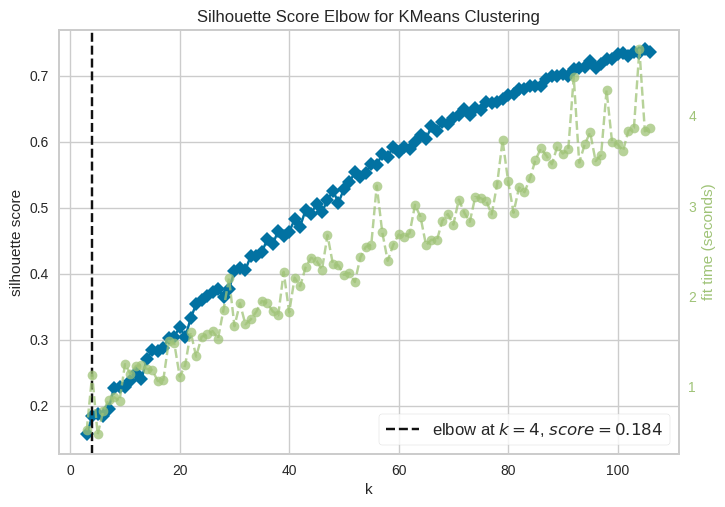

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [26]:
visualizer = KElbowVisualizer(model_view_elbow, k=(3,107), metric='silhouette')

visualizer.fit(X_genre_type)        
visualizer.show()

**Metric calinski_harabasz**

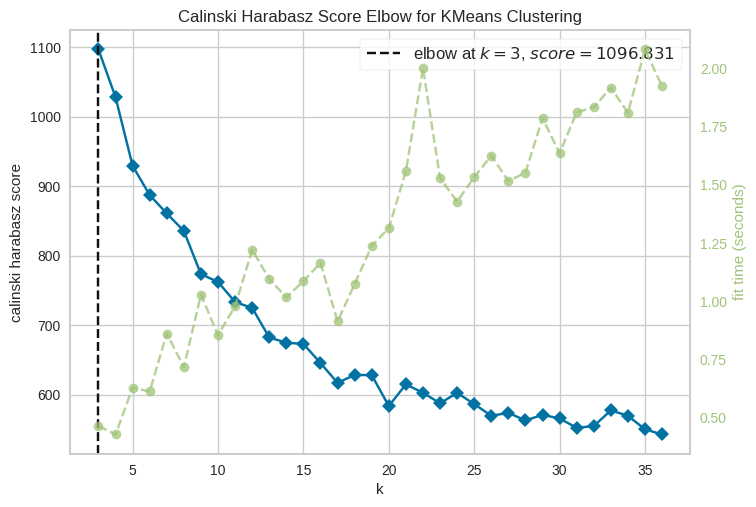

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [27]:
visualizer = KElbowVisualizer(model_view_elbow, k=(3,37), metric='calinski_harabasz')

visualizer.fit(X_genre_type)        
visualizer.show()

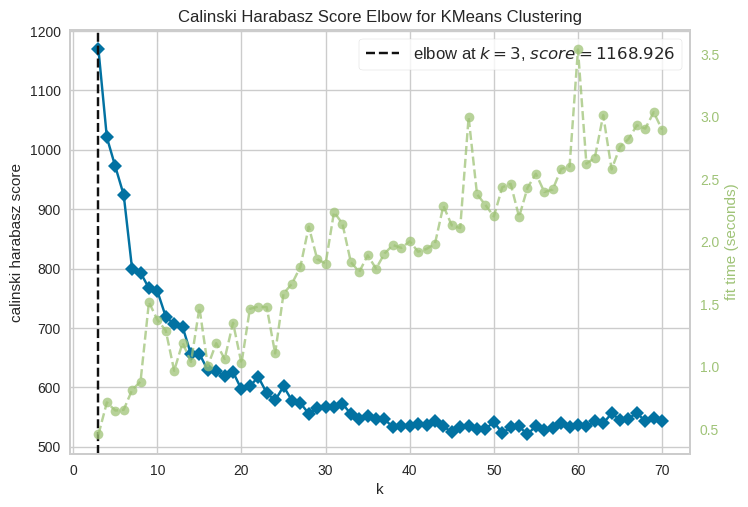

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [28]:
visualizer = KElbowVisualizer(model_view_elbow, k=(3,71), metric='calinski_harabasz')

visualizer.fit(X_genre_type)        
visualizer.show()

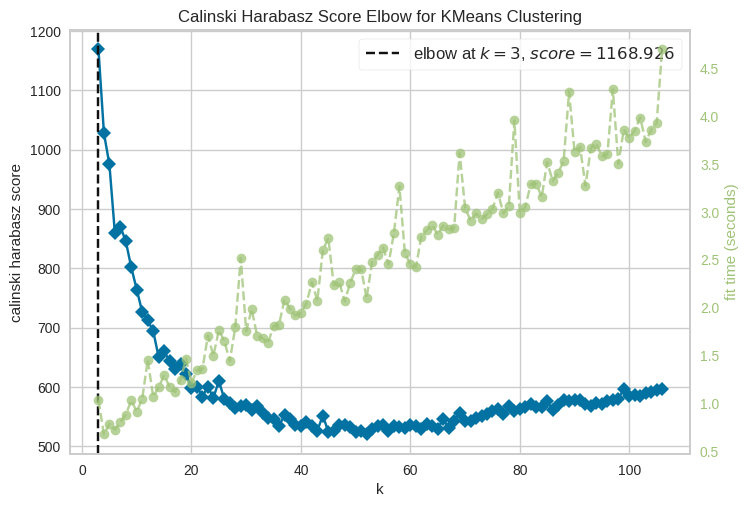

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [29]:
visualizer = KElbowVisualizer(model_view_elbow, k=(3,107), metric='calinski_harabasz')

visualizer.fit(X_genre_type)        
visualizer.show()

**Metric distortion**

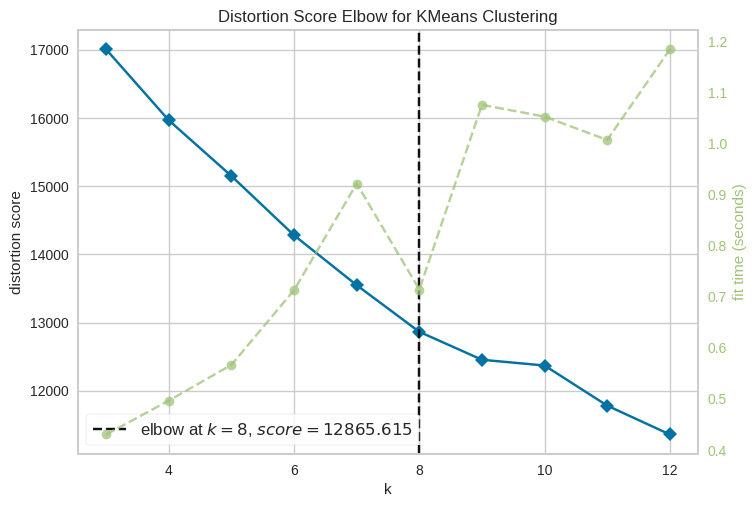

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
model = KMeans()
visualizer = KElbowVisualizer(model_view_elbow, k=(3,13), metric='distortion')

visualizer.fit(X_genre_type)        
visualizer.show()

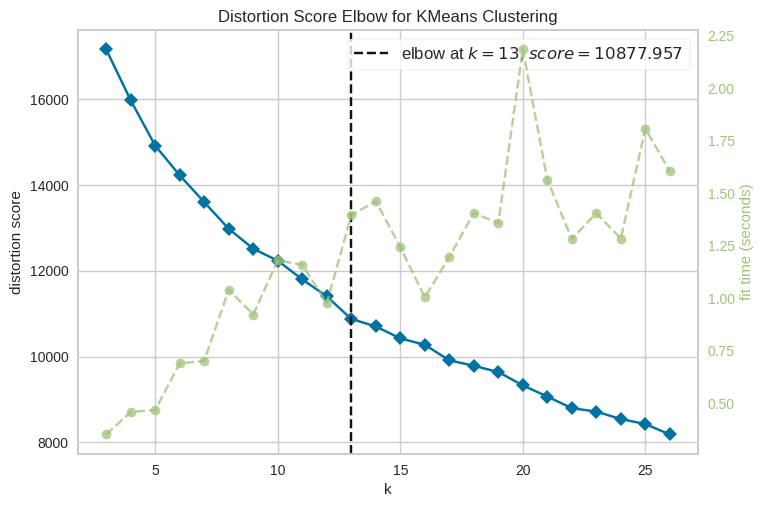

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
model = KMeans()
visualizer = KElbowVisualizer(model_view_elbow, k=(3,27), metric='distortion')

visualizer.fit(X_genre_type)        
visualizer.show()

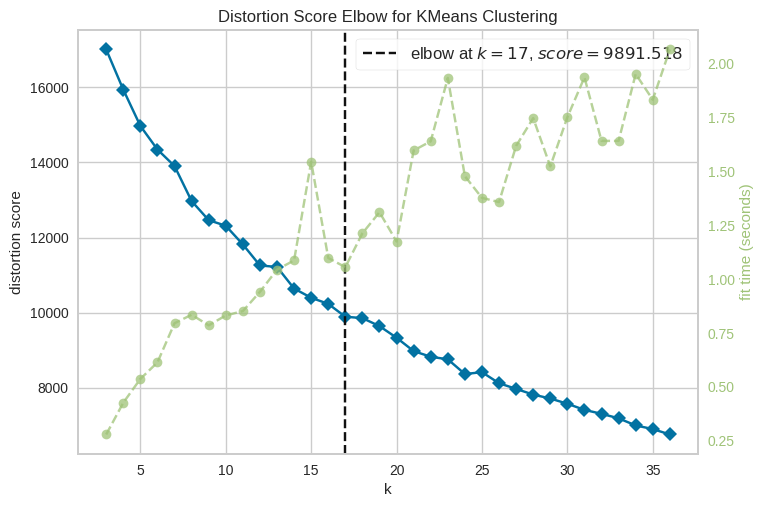

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
model = KMeans()
visualizer = KElbowVisualizer(model_view_elbow, k=(3,37), metric='distortion')

visualizer.fit(X_genre_type)        
visualizer.show()

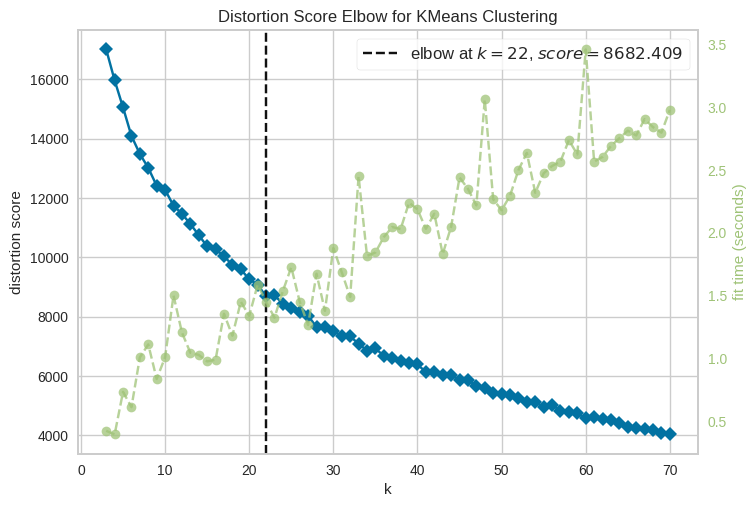

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
model = KMeans()
visualizer = KElbowVisualizer(model_view_elbow, k=(3,71), metric='distortion')

visualizer.fit(X_genre_type)        
visualizer.show()

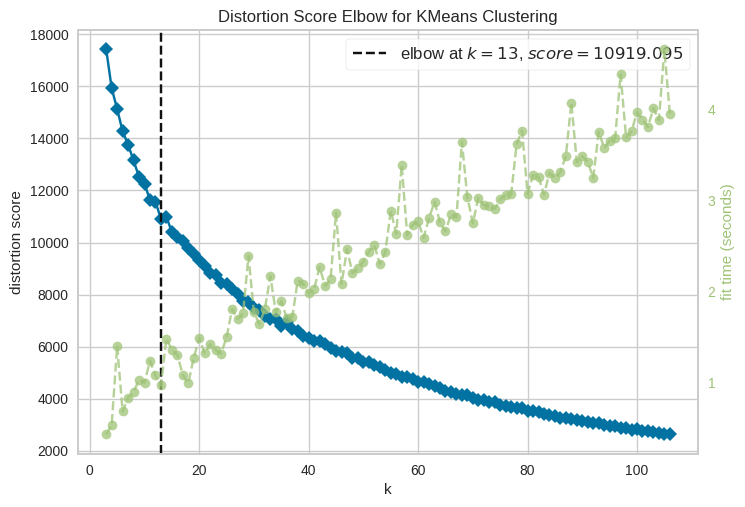

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
model = KMeans()
visualizer = KElbowVisualizer(model_view_elbow, k=(3,107), metric='distortion')

visualizer.fit(X_genre_type)        
visualizer.show()

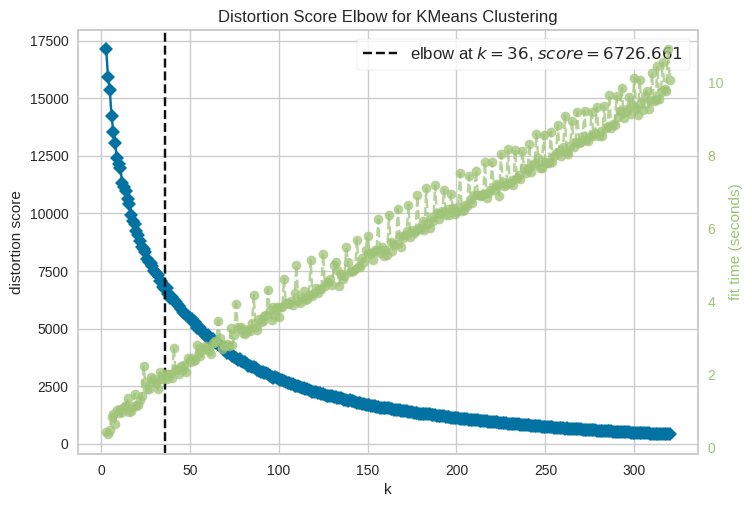

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
model = KMeans()
visualizer = KElbowVisualizer(model_view_elbow, k=(3,(3*107)), metric='distortion')

visualizer.fit(X_genre_type)        
visualizer.show()

----------


# Training Model

In [36]:
kmeans_model = KMeans(n_clusters = 3, random_state=0)
y_Kmeans3 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans3)
print(np.unique(y_Kmeans3))
print(len(np.unique(y_Kmeans3)))
print(f'Amount genre: {len(group_dummies.columns)}')

[0 1 1 ... 2 2 2]
[0 1 2]
3
Amount genre: 108


In [37]:
kmeans_model = KMeans(n_clusters = 13, random_state=0)
y_Kmeans13 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans13)
print(np.unique(y_Kmeans13))
print(len(np.unique(y_Kmeans13)))
print(f'Amount genre: {len(group_dummies.columns)}')

[3 7 9 ... 2 0 5]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
13
Amount genre: 108


In [38]:
kmeans_model = KMeans(n_clusters = 27, random_state=0)
y_Kmeans27 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans27)
print(np.unique(y_Kmeans27))
print(len(np.unique(y_Kmeans27)))
print(f'Amount genre: {len(group_dummies.columns)}')

[ 1  4  8 ...  3  5 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
27
Amount genre: 108


In [39]:
kmeans_model = KMeans(n_clusters = 37, random_state=0)
y_Kmeans37 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans37)
print(np.unique(y_Kmeans37))
print(len(np.unique(y_Kmeans37)))
print(f'Amount genre: {len(group_dummies.columns)}')

[ 1 33 10 ...  7  4  3]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
37
Amount genre: 108


In [40]:
kmeans_model = KMeans(n_clusters = 71, random_state=0)
y_Kmeans71 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans71)
print(np.unique(y_Kmeans71))
print(len(np.unique(y_Kmeans71)))
print(f'Amount genre: {len(group_dummies.columns)}')

[ 1 58 10 ... 30  5 45]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
71
Amount genre: 108


In [41]:
kmeans_model = KMeans(n_clusters = 107, random_state=0)
y_Kmeans107 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans107)
print(np.unique(y_Kmeans107))
print(len(np.unique(y_Kmeans107)))
print(f'Amount genre: {len(group_dummies.columns)}')

[ 1 70 12 ...  3 16 57]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106]
107
Amount genre: 108


In [42]:
kmeans_model = KMeans(n_clusters = 34, random_state=0)
y_Kmeans34 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans34)
print(np.unique(y_Kmeans34))
print(len(np.unique(y_Kmeans34)))
print(f'Amount genre: {len(group_dummies.columns)}')

[1 6 3 ... 2 5 8]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
34
Amount genre: 108


In [43]:
data_netflix_cluster = data_netflix.copy()

In [44]:
data_netflix_cluster['clusters_genre'] = y_Kmeans34

----

# Recommend Movies 

In [45]:
data_netflix_cluster.head()

,movie_or_tv_show,title,director,cast,country,date_added_platform,release_year,duration_seconds,gender_type,description,clusters_genre
0,Movie,DICK JOHNSON IS DEAD,Kirsten Johnson,uninformed cast,United States,"September 25, 2021",2020,90 min,DOCUMENTARIES,"As her father nears the end of his life, filmm...",1
1,TV Show,BLOOD & WATER,uninformed director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,2 Seasons,"INTERNATIONAL TV SHOWS, TV DRAMAS, TV MYSTERIES","After crossing paths at a party, a Cape Town t...",6
2,TV Show,GANGLANDS,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",uninformed country,"September 24, 2021",2021,1 Season,"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, TV ACT...",To protect his family from a powerful drug lor...,3
3,TV Show,JAILBIRDS NEW ORLEANS,uninformed director,uninformed cast,uninformed country,"September 24, 2021",2021,1 Season,"DOCUSERIES, REALITY TV","Feuds, flirtations and toilet talk go down amo...",14
4,TV Show,KOTA FACTORY,uninformed director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,2 Seasons,"INTERNATIONAL TV SHOWS, ROMANTIC TV SHOWS, TV ...",In a city of coaching centers known to train I...,13


In [46]:
name = 'The Stronghold'.upper()
data_netflix_cluster[data_netflix_cluster['title'] ==  name] 

,movie_or_tv_show,title,director,cast,country,date_added_platform,release_year,duration_seconds,gender_type,description,clusters_genre
36,Movie,THE STRONGHOLD,Cédric Jimenez,"Gilles Lellouche, Karim Leklou, François Civil...",uninformed country,"September 17, 2021",2021,105 min,"ACTION & ADVENTURE, DRAMAS, INTERNATIONAL MOVIES","Tired of the small-time grind, three Marseille...",33


In [47]:
data_netflix_cluster[data_netflix_cluster['title'] ==  name][['clusters_genre', 'gender_type']]

,clusters_genre,gender_type
36,33,"ACTION & ADVENTURE, DRAMAS, INTERNATIONAL MOVIES"


In [48]:
data_netflix_cluster[data_netflix_cluster['clusters_genre'] ==  10 ][['title', 'gender_type']]

,title,gender_type
16,EUROPE'S MOST DANGEROUS MAN: OTTO SKORZENY IN ...,"DOCUMENTARIES, INTERNATIONAL MOVIES"
68,SCHUMACHER,"DOCUMENTARIES, INTERNATIONAL MOVIES, SPORTS MO..."
88,BLOOD BROTHERS: MALCOLM X & MUHAMMAD ALI,"DOCUMENTARIES, SPORTS MOVIES"
91,THE WOMEN AND THE MURDERER,"DOCUMENTARIES, INTERNATIONAL MOVIES"
96,IF I LEAVE HERE TOMORROW: A FILM ABOUT LYNYRD ...,"DOCUMENTARIES, MUSIC & MUSICALS"
...,...,...
8728,WHEN TWO WORLDS COLLIDE,"DOCUMENTARIES, INTERNATIONAL MOVIES"
8734,WHO THE F**K IS THAT GUY?,"DOCUMENTARIES, LGBTQ MOVIES, MUSIC & MUSICALS"
8744,WILLIAMS,"DOCUMENTARIES, INTERNATIONAL MOVIES, SPORTS MO..."
8746,WINNIE,"DOCUMENTARIES, INTERNATIONAL MOVIES"


In [49]:
from dataclasses import dataclass

@dataclass
class QueryRecommends:
    dataset: pd.core.frame.DataFrame
    name: str 
    top_n: int = 10

def recommends(query: QueryRecommends) -> pd.core.frame.DataFrame:
    result = query['dataset'][query['dataset']['title'] == query['name'].upper()][['clusters_genre']].reset_index()
    result = result.at[0, 'clusters_genre']
    return query['dataset'][query['dataset']['clusters_genre'] == int(result)][['title', 'gender_type']][:query['top_n']]

# International

In [50]:
result = recommends({'dataset': data_netflix_cluster, 'name': 'Narcos', 'top_n': 10})
result

,title,gender_type
2,GANGLANDS,"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, TV ACT..."
11,BANGKOK BREAKING,"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, TV ACT..."
17,FALSA IDENTIDAD,"CRIME TV SHOWS, SPANISH-LANGUAGE TV SHOWS, TV ..."
82,LUCIFER,"CRIME TV SHOWS, TV COMEDIES, TV DRAMAS"
109,LA CASA DE PAPEL,"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, SPANIS..."
125,Q-FORCE,"CRIME TV SHOWS, TV ACTION & ADVENTURE, TV COME..."
165,OLDSTERS,"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, SPANIS..."
198,KING OF BOYS: THE RETURN OF THE KING,"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, TV DRAMAS"
260,THE DEFEATED,"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, TV DRAMAS"
273,GONE FOR GOOD,"CRIME TV SHOWS, INTERNATIONAL TV SHOWS, TV DRAMAS"


# Action

In [51]:
result = recommends({'dataset': data_netflix_cluster, 'name': 'The Stronghold', 'top_n': 10})
result

,title,gender_type
36,THE STRONGHOLD,"ACTION & ADVENTURE, DRAMAS, INTERNATIONAL MOVIES"
51,INUYASHA THE MOVIE 2: THE CASTLE BEYOND THE LO...,"ACTION & ADVENTURE, ANIME FEATURES, INTERNATIO..."
52,INUYASHA THE MOVIE 3: SWORDS OF AN HONORABLE R...,"ACTION & ADVENTURE, ANIME FEATURES, INTERNATIO..."
53,INUYASHA THE MOVIE 4: FIRE ON THE MYSTIC ISLAND,"ACTION & ADVENTURE, ANIME FEATURES, INTERNATIO..."
54,INUYASHA THE MOVIE: AFFECTIONS TOUCHING ACROSS...,"ACTION & ADVENTURE, ANIME FEATURES, INTERNATIO..."
56,NARUTO SHIPPUDEN THE MOVIE: BLOOD PRISON,"ACTION & ADVENTURE, ANIME FEATURES, INTERNATIO..."
57,NARUTO SHIPPÛDEN THE MOVIE: BONDS,"ACTION & ADVENTURE, ANIME FEATURES, INTERNATIO..."
58,NARUTO SHIPPÛDEN THE MOVIE: THE WILL OF FIRE,"ACTION & ADVENTURE, ANIME FEATURES, INTERNATIO..."
59,NARUTO SHIPPUDEN: THE MOVIE,"ACTION & ADVENTURE, ANIME FEATURES, INTERNATIO..."
60,NARUTO SHIPPUDEN: THE MOVIE: THE LOST TOWER,"ACTION & ADVENTURE, ANIME FEATURES, INTERNATIO..."


# Comedies

In [52]:
result = recommends({'dataset': data_netflix_cluster, 'name': 'Zombieland', 'top_n': 10})
result

,title,gender_type
9,THE STARLING,"COMEDIES, DRAMAS"
22,AVVAI SHANMUGHI,"COMEDIES, INTERNATIONAL MOVIES"
26,MINSARA KANAVU,"COMEDIES, INTERNATIONAL MOVIES, MUSIC & MUSICALS"
113,AFTERLIFE OF THE PARTY,"COMEDIES, ROMANTIC MOVIES"
144,HOUSE PARTY,"COMEDIES, CULT MOVIES"
145,HOUSE PARTY 2,"COMEDIES, CULT MOVIES, MUSIC & MUSICALS"
146,HOUSE PARTY 3,"COMEDIES, MUSIC & MUSICALS"
158,LOVE DON'T COST A THING,"COMEDIES, ROMANTIC MOVIES"
161,MARS ATTACKS!,"COMEDIES, CULT MOVIES, SCI-FI & FANTASY"
163,MY BOSS'S DAUGHTER,"COMEDIES, ROMANTIC MOVIES"


# Anime

In [53]:
result = recommends({'dataset': data_netflix_cluster, 'name': 'Yu-Gi-Oh! Arc-V', 'top_n': 10})
result

,title,gender_type
5,MIDNIGHT MASS,"TV DRAMAS, TV HORROR, TV MYSTERIES"
8,THE GREAT BRITISH BAKING SHOW,"BRITISH TV SHOWS, REALITY TV"
25,LOVE ON THE SPECTRUM,"DOCUSERIES, INTERNATIONAL TV SHOWS, REALITY TV"
32,SEX EDUCATION,"BRITISH TV SHOWS, INTERNATIONAL TV SHOWS, TV C..."
66,RAJA RASOI AUR ANYA KAHANIYAN,"DOCUSERIES, INTERNATIONAL TV SHOWS"
76,YOWAMUSHI PEDAL,"ANIME SERIES, INTERNATIONAL TV SHOWS"
85,POKÉMON MASTER JOURNEYS: THE SERIES,"ANIME SERIES, KIDS' TV"
98,OCTONAUTS: ABOVE & BEYOND,"BRITISH TV SHOWS, KIDS' TV"
110,MONEY HEIST: FROM TOKYO TO BERLIN,"DOCUSERIES, INTERNATIONAL TV SHOWS, SPANISH-LA..."
154,KUROKO'S BASKETBALL,"ANIME SERIES, INTERNATIONAL TV SHOWS, TEEN TV ..."


In [54]:
result = recommends({'dataset': data_netflix_cluster, 'name': 'ATTACK ON TITAN', 'top_n': 10})
result

,title,gender_type
5,MIDNIGHT MASS,"TV DRAMAS, TV HORROR, TV MYSTERIES"
8,THE GREAT BRITISH BAKING SHOW,"BRITISH TV SHOWS, REALITY TV"
25,LOVE ON THE SPECTRUM,"DOCUSERIES, INTERNATIONAL TV SHOWS, REALITY TV"
32,SEX EDUCATION,"BRITISH TV SHOWS, INTERNATIONAL TV SHOWS, TV C..."
66,RAJA RASOI AUR ANYA KAHANIYAN,"DOCUSERIES, INTERNATIONAL TV SHOWS"
76,YOWAMUSHI PEDAL,"ANIME SERIES, INTERNATIONAL TV SHOWS"
85,POKÉMON MASTER JOURNEYS: THE SERIES,"ANIME SERIES, KIDS' TV"
98,OCTONAUTS: ABOVE & BEYOND,"BRITISH TV SHOWS, KIDS' TV"
110,MONEY HEIST: FROM TOKYO TO BERLIN,"DOCUSERIES, INTERNATIONAL TV SHOWS, SPANISH-LA..."
154,KUROKO'S BASKETBALL,"ANIME SERIES, INTERNATIONAL TV SHOWS, TEEN TV ..."


# Horror

In [55]:
result = recommends({'dataset': data_netflix_cluster, 'name': 'Would You Rather', 'top_n': 10})
result

,title,gender_type
35,THE FATHER WHO MOVES MOUNTAINS,"DRAMAS, INTERNATIONAL MOVIES, THRILLERS"
42,JAWS 2,"DRAMAS, HORROR MOVIES, THRILLERS"
103,SHADOW PARTIES,"DRAMAS, INTERNATIONAL MOVIES, THRILLERS"
114,ANJAAM,"DRAMAS, INTERNATIONAL MOVIES, THRILLERS"
118,GURGAON,"DRAMAS, INTERNATIONAL MOVIES, THRILLERS"
128,AGATHA CHRISTIE'S CROOKED HOUSE,"DRAMAS, INTERNATIONAL MOVIES, THRILLERS"
140,"EL PATRÓN, RADIOGRAFÍA DE UN CRIMEN","DRAMAS, INTERNATIONAL MOVIES, THRILLERS"
201,KUCCH TO HAI,"DRAMAS, INTERNATIONAL MOVIES, THRILLERS"
236,BOOMIKA,"HORROR MOVIES, INTERNATIONAL MOVIES, THRILLERS"
237,BOOMIKA (HINDI),"HORROR MOVIES, INTERNATIONAL MOVIES, THRILLERS"
